# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 4
*gelöst von Stollmayer Max*

### Aufgabe 1

Zusatzaufgabe

### Aufgabe 2

Zu implementieren ist das Mehrschrittverfahren nach Adams-Bashforth. Dabei sind die drei zusätzlichen Startwerte mittels Vorwärts-Euler, Runge-Kutta-4 und der exakten Lösung zu bestimmen und deren Performance zu vergleichen.

#### Definitions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcdefaults

rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = [12.8, 7.2]
plt.rcParams["font.size"] = 12
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"] = 0.75
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "white"

In [2]:
def forward_euler(f, y0, t0, tN, N):
    '''
    Returns list of function values approximated with the forward Euler method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t0 ... start of interval
    tN ... end of interval
    N .... number of steps
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    for n in range(N):
        y[n+1] = y[n] + h * f(y[n], t[n])

    return y

In [3]:
def rk4(f, y0, t0, tN, N):
    '''
    Returns list of function values approximated with the Runge-Kutta method of 4th order.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t0 ... start of interval
    tN ... end of interval
    N ...... number of steps
    '''
    
    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0
    
    for n in range(N):
        k1 = f(y[n], t[n])
        k2 = f(y[n] + h/2 * k1, t[n] + h/2)
        k3 = f(y[n] + h/2 * k2, t[n] + h/2)
        k4 = f(y[n] + h * k3, t[n] + h)
        y[n+1] = y[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return y

In [4]:
def adams_bashforth(f, inits, t0, tN, N):
    '''
    Returns list of function values approximated with the Adams-Bashforth method.

    f ...... function of ODE y' = f(y, t)
    vals ... initial values (y0, y1, y2, y3)
    t0 ... start of interval
    tN ... end of interval
    N ...... number of steps
    '''
    
    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = np.zeros(N+1) if isinstance(inits[0], (int, float)) else np.zeros((N+1, np.size(inits[0])))
    for n, val in enumerate(inits):
        y[n] = val
    
    for n in range(N-3):
        y[n+4] = y[n+3] + h/24 * (55*f(y[n+3], t[n+3]) - 59*f(y[n+2], t[n+2]) + 37*f(y[n+1], t[n+1]) - 9*f(y[n], t[n]))
        
    return y

#### Test
$y'(t) = -2\ t\ y(t)^2, \quad y(0) = 1$

In [5]:
def f(y, t):
    return -2 * t * y**2

def exact(t):
    return 1 / (t**2 + 1)

def error(y):
    return np.abs(y[-1] - exact(tN))

def order(e, h):
    return np.log(e) / np.log(h)

steps = 10 * 2**np.arange(6)
y0 = 1
t0 = 0
tN = 1

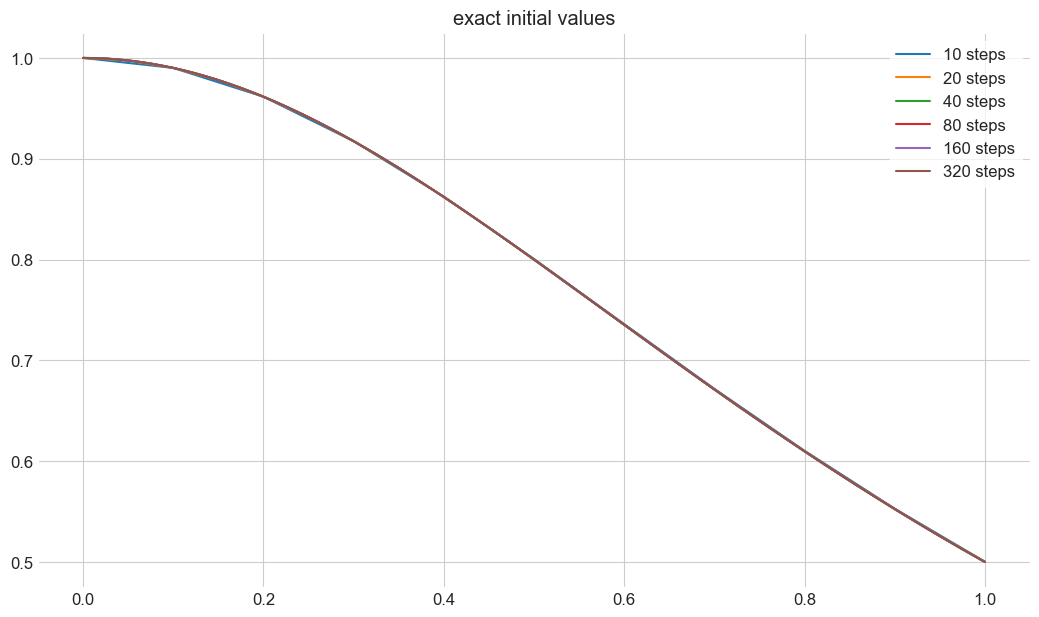

In [6]:
errors1 = ()
rates1 = ()
for N in steps:
    inits = exact(np.arange(4)/N)
    y = adams_bashforth(f, inits, t0, tN, N)
    e = error(y)
    errors1 += (e,)
    rates1 += (order(e, 1/N),)
    plt.plot(np.arange(N+1)/N, y, label=f"{N} steps")

plt.title("exact initial values")
plt.legend()
plt.show()

order1 = sum(rates1)/len(rates1)

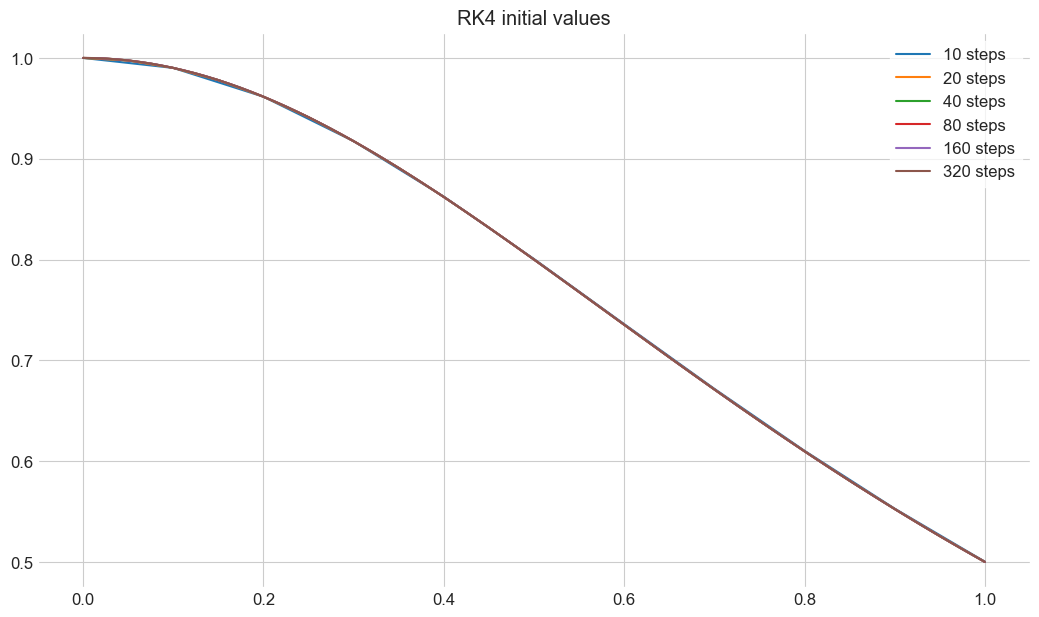

In [7]:
errors2 = ()
rates2 = ()
for N in steps:
    inits = rk4(f, y0, t0, tN, N)[0:4].flatten()
    y = adams_bashforth(f, inits, t0, tN, N)
    e = error(y)
    errors2 += (e,)
    rates2 += (order(e, 1/N),)
    plt.plot(np.arange(N+1)/N, y, label=f"{N} steps")

plt.title("RK4 initial values")
plt.legend()
plt.show()

order2 = sum(rates2)/len(rates2)

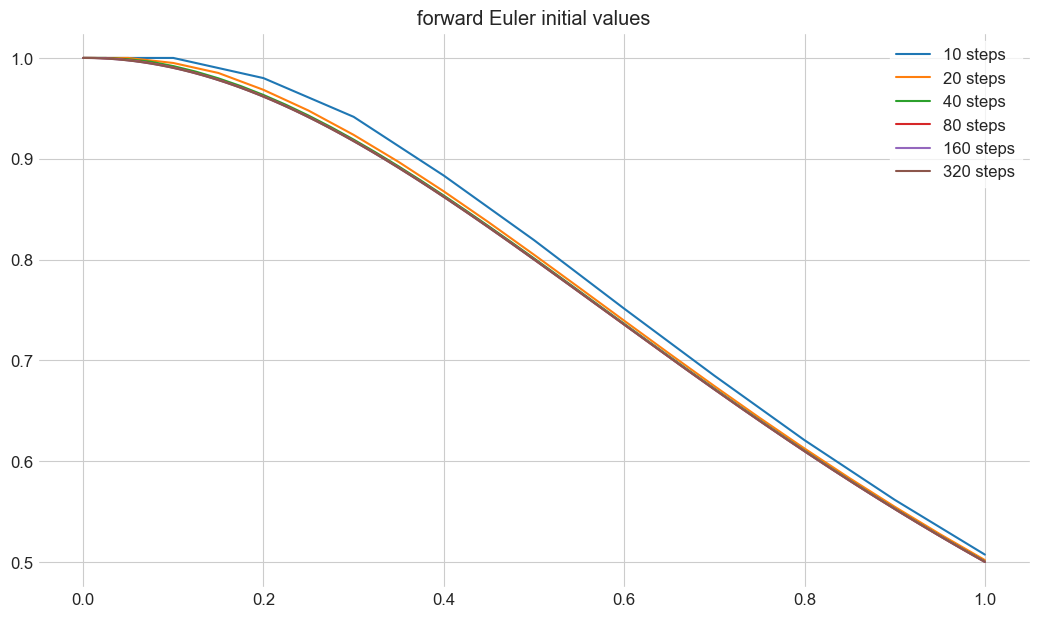

In [8]:
errors3 = ()
rates3 = ()
for N in steps:
    inits = forward_euler(f, y0, t0, tN, N)[0:4].flatten()
    y = adams_bashforth(f, inits, t0, tN, N)
    e = error(y)
    errors3 += (e,)
    rates3 += (order(e, 1/N),)
    plt.plot(np.arange(N+1)/N, y, label=f"{N} steps")

plt.title("forward Euler initial values")
plt.legend()
plt.show()

order3 = sum(rates3)/len(rates3)

In [9]:
print(" initial values:    exact   |    RK4    | f. Euler")
for i in range(len(steps)):
    print(f"{steps[i]:3} steps error:  {errors1[i]:.3E} | {errors2[i]:.3E} | {errors3[i]:.3E}")
print(f"\t  order:  {order1:5.0f}     | {order2:5.0f}     | {order3:5.0f}")

 initial values:    exact   |    RK4    | f. Euler
 10 steps error:  2.374E-04 | 2.372E-04 | 7.284E-03
 20 steps error:  1.303E-05 | 1.303E-05 | 1.863E-03
 40 steps error:  7.536E-07 | 7.535E-07 | 4.679E-04
 80 steps error:  4.493E-08 | 4.493E-08 | 1.171E-04
160 steps error:  2.736E-09 | 2.735E-09 | 2.929E-05
320 steps error:  1.686E-10 | 1.686E-10 | 7.324E-06
	  order:      4     |     4     |     2
